In [1]:
from __future__ import print_function 
import numpy as np
import matplotlib.pylab as pl
%pylab inline 
import scipy as sp
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


## Plot Your Original Distribution

In [2]:
#Setting a random seed so it is reproducible 
np.random.seed(999)

#Setting the population mean and size
pop_mean = 100
Nsize = 5000

#Setting population standard deviaiton
pop_std = 10
#pop_std = (pop_mean/(np.sqrt(Nsize)))

#Making my population
pop = sp.stats.poisson.rvs(mu=pop_mean, size=(Nsize))
pop

significance_level = 0.05

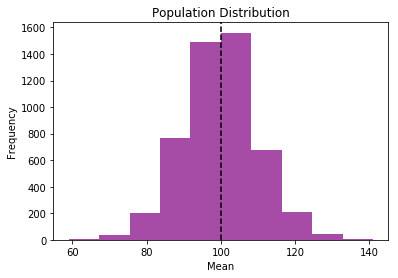

In [3]:
pl.hist(pop, alpha=0.7, color='purple')
pl.axvline(pop_mean, color = 'black', linestyle='--')
pl.title("Population Distribution")
pl.xlabel("Mean")
pl.ylabel("Frequency")

##### Fig 1. This is a histogram of my entire population: 300 values with a mean of 100

## Plot at least one of the samples

In [4]:
#Dediciding how many samples I'll take and how big each one will be. Going to take 100 samples, each with 50 values
nsample = 1000
sample_size = 50
#Creating a np zeros to hold the sample data
sample = np.zeros((nsample, sample_size))

In [5]:
for i in range(nsample): 
    sample[i] = np.random.choice(pop, sample_size)

In [6]:
#Looking at a random sample. Shows 50 values
sample[9]

array([  93.,   98.,   91.,   99.,  116.,   95.,  106.,   99.,  112.,
         82.,   87.,  102.,   93.,   86.,   97.,  105.,   86.,   84.,
         93.,   90.,   91.,   86.,  107.,  114.,  105.,  100.,   95.,
         96.,   98.,  101.,   85.,  123.,   85.,   84.,   87.,  110.,
        100.,  104.,   83.,   96.,  102.,   99.,  104.,   94.,  107.,
         85.,  101.,  103.,   98.,   91.])

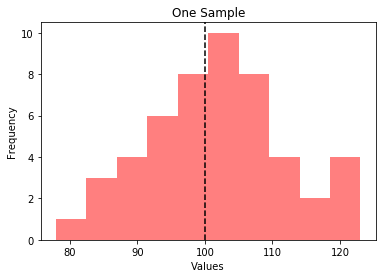

In [7]:
pl.hist(sample[8], color='red', alpha=0.5)
pl.axvline(pop_mean, color = 'black', linestyle='--')
pl.title("One Sample")
pl.xlabel("Values")
pl.ylabel("Frequency")

##### Fig 2. This is a histogram of a single sample (50 values drawn from an overall population of 1000) 

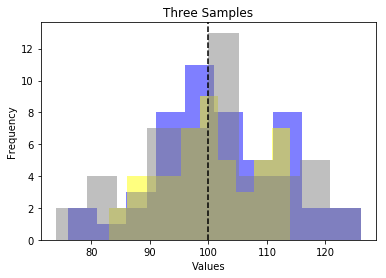

In [8]:
pl.hist(sample[45], color='blue', alpha=0.5)
pl.hist(sample[64], color='yellow', alpha=0.5)
pl.hist(sample[94], color='gray', alpha=0.5)
pl.axvline(pop_mean, color = 'black', linestyle='--')
pl.title("Three Samples")
pl.xlabel("Values")
pl.ylabel("Frequency")

##### Fig 3. This is 3 histograms, each a different sample. 

In [9]:
sample_mean = np.zeros(nsample)

In [10]:
for i in range(len(sample)):
    sample_mean[i] = sample[i].mean()

In [11]:
#Show means of all samples
#sample_mean

In [12]:
#Check the means of the samples is similiar to the population mean (100)
print(sample_mean.mean())

99.72276


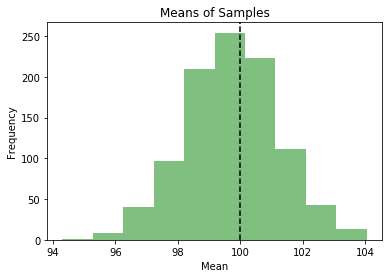

In [13]:
pl.hist(sample_mean, color='green', alpha=0.5)
pl.axvline(pop_mean, color = 'black', linestyle='--')
pl.title("Means of Samples")
pl.xlabel("Mean")
pl.ylabel("Frequency")

##### Fig 4. This is a histogram of the means of the samples taken. (I took 100 samples, each consisting of 50 values, with an overall population of 1000)

## Plot the distribution of z statistics

In [14]:
z = (sample_mean - pop_mean) / (pop_std / np.sqrt(sample_size))
#z

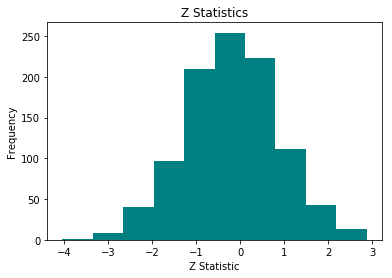

In [15]:
pl.hist(z, color='teal')
pl.title("Z Statistics")
pl.xlabel("Z Statistic")
pl.ylabel("Frequency")

##### Fig 5. This is the histogram of the z statistics 

## Fit the z-statistics with a gaussian model

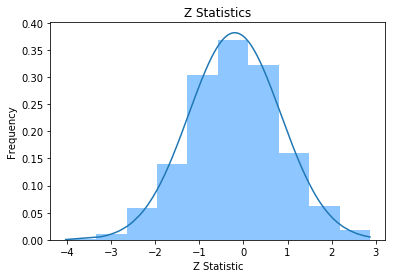

In [16]:
z = sort(z)
pl.hist(z, color='dodgerblue', alpha=0.5, normed=True)
fit = stats.norm.pdf(z, np.mean(z), np.std(z))
pl.plot(z, fit)
pl.title("Z Statistics")
pl.xlabel("Z Statistic")
pl.ylabel("Frequency")
plt.show()

##### Fig 6. This line is a normal Gaussian distribution. It shows the z statistics are generally in line with a normal distribution

In [17]:
#Seeing if the mean is close to 0
z.mean()

-0.19603828401615847

In [18]:
#Seeing if the standard deviation is close to 1
z.std()

1.0449234379608874

## Assess the goodness of fit with a simple test (AD or KS)

In [19]:
print(stats.kstest(z, 'norm'))
print("Significance Level:", significance_level)

KstestResult(statistic=0.091562997397791557, pvalue=9.5584886006250258e-08)
Significance Level: 0.05


##### The pvalue here is above a significance level of 0.05. Thus, we cannot reject the null hypothesis that the samples were drawn form the same parent distribution. 

The p-value returned by the k-s test has the same interpretation as other p-values. You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level. 

In [20]:
stats.anderson(z, 'norm')

AndersonResult(statistic=0.12166693982590004, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

###### The statistic is less than the critical value at the signifance level, so H0 cannot be rejected. 